In [175]:
import pandas

In [3]:
import os

In [4]:
os.chdir('h:/data/Ferric-carboxymaltose/serije/filtracija/')

In [9]:
hk5731=pandas.read_excel('HK5731_filtracija.xlsx')

In [284]:
gn7594=pandas.read_excel('GN7594_filtracija.xlsx')
gn7594['time']=gn7594['datetime']-gn7594['datetime'][0]
gn7594['time']=(gn7594['time']/np.timedelta64(1,'m'))

In [304]:
gn7594['pretok']

0      2.284965
1      1.553972
2      0.976923
3      0.538212
4      0.222231
5      0.013374
6     -0.103966
7     -0.145397
8     -0.126526
9     -0.062959
10     0.029696
11     0.135833
12     0.239844
13     0.328995
14     0.402038
15     0.460596
16     0.506296
17     0.540761
18     0.565616
19     0.582485
20     0.592992
21     0.598763
22     0.601421
23     0.602591
24     0.603624
25     0.604782
26     0.606051
27     0.607418
28     0.608873
29     0.610401
         ...   
701    0.031017
702    0.032119
703    0.032066
704    0.030692
705    0.027829
706    0.023309
707    0.016965
708    0.008631
709   -0.001571
710   -0.012353
711   -0.022133
712   -0.029333
713   -0.032373
714   -0.029673
715   -0.019653
716   -0.000735
717    0.028662
718    0.070118
719    0.125212
720    0.193415
721    0.265770
722    0.331208
723    0.378663
724    0.397068
725    0.375355
726    0.302458
727    0.167310
728   -0.041157
729   -0.334008
730   -0.722313
Name: pretok, dtype: flo

In [324]:
gn7594['masa']=gn7594['WIRC 016.040'][0]-gn7594['WIRC 016.040']
spl7594=UnivariateSpline(gn7594['time'],gn7594['masa'],k=4,s=40)
a7594=spl7594.derivative(1)
gn7594['pretok']=a7594(gn7594['time'])
gn7594['tlak']=gn7594['PIC 016.010']-gn7594['PIR 016.012']
gn7594['tlak1']=gn7594['PIR 016.012']-gn7594['PIR 016.013']

In [165]:
hk5733=pandas.read_excel('HK5733_filtracija.xlsx')
hk5746=pandas.read_excel('HK5746_filtracija.xlsx')

In [176]:
hk5746['time']=hk5746['datetime']-hk5746['datetime'][0]
hk5733['time']=hk5733['datetime']-hk5733['datetime'][0]

In [256]:
hk5746['tlak1']=hk5746['PIR.016.012']-hk5746['PIR.016.013']
hk5733['tlak1']=hk5733['PIR.016.012']-hk5733['PIR.016.013']
hk5731['tlak1']=hk5731['PIR.016.012']-hk5731['PIR.016.013']

In [257]:
hk5746['tlak2']=hk5746['PIR.016.013']-hk5746['PIC.030.010']
hk5733['tlak2']=hk5733['PIR.016.013']-hk5733['PIC.030.010']
hk5731['tlak2']=hk5731['PIR.016.013']-hk5731['PIC.030.010']

In [264]:
hk5746['tlak']=hk5746['PIC.016.010']-hk5746['PIR.016.012']
hk5733['tlak']=hk5733['PIC.016.010']-hk5733['PIR.016.012']
hk5731['tlak']=hk5731['PIC.016.010']-hk5731['PIR.016.012']

In [177]:
hk5746['time']=(hk5746['time']/np.timedelta64(1,'m'))
hk5733['time']=(hk5733['time']/np.timedelta64(1,'m'))

In [319]:
gn7594['pretok'][:20]

0    -0.080608
1    -0.032329
2     0.013640
3     0.057360
4     0.098889
5     0.138285
6     0.175608
7     0.210916
8     0.244267
9     0.275722
10    0.305337
11    0.333173
12    0.359288
13    0.383741
14    0.406590
15    0.427894
16    0.447712
17    0.466103
18    0.483126
19    0.498838
Name: pretok, dtype: float64

import matplotlib.pyplot as plt

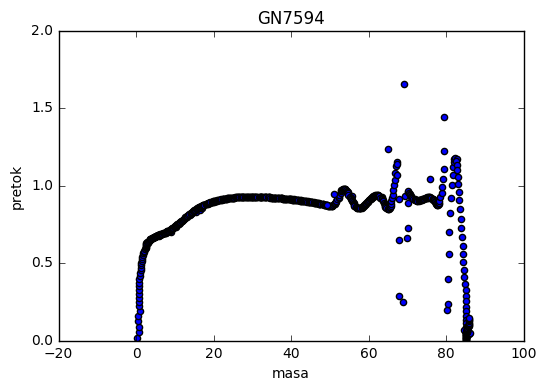

In [325]:
#pl5733=hk5733.plot.scatter(x='masa',y='tlak2',title="HK5733",ylim=(0,1.5),xlim=(0,120))
pl7594=gn7594.plot.scatter(x='masa',y='pretok',title="GN7594",ylim=(0,2))
#pl5731=hk5731.plot.scatter(x='masa',y='tlak2',title="HK5731",ylim=(0,1.5),xlim=(0,120))
#pl5746=hk5746.plot.scatter(x='masa',y='tlak2',title="HK5746",ylim=(0,1.5),xlim=(0,120))
#pl5733.set_xlabel("masa (kg)")
#pl5731.set_xlabel("masa (kg)")
#pl5746.set_xlabel("masa (kg)")
plt.show()

In [86]:
from scipy.interpolate import UnivariateSpline

In [196]:
spl5731=UnivariateSpline(hk5731['time'],hk5731['masa'],k=4,s=7)
spl5733=UnivariateSpline(hk5733['time'],hk5733['masa'],k=4,s=7)
spl5746=UnivariateSpline(hk5746['time'],hk5746['masa'],k=4,s=7)

In [189]:
x=np.linspace(0,80,num=100)

In [197]:
a5731=spl5731.derivative(1)
a5733=spl5733.derivative(1)
a5746=spl5746.derivative(1)

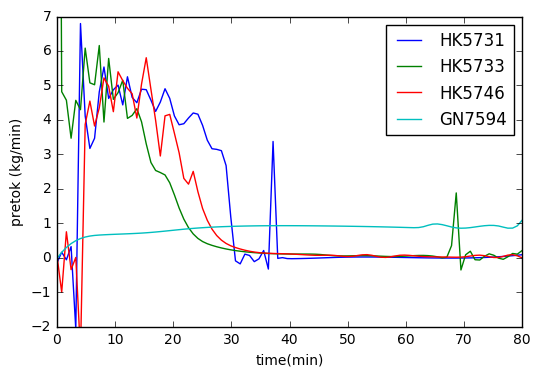

In [326]:
plt.plot(x,a5731(x),label='HK5731')
plt.plot(x,a5733(x),label='HK5733')
plt.plot(x,a5746(x),label='HK5746')
plt.plot(x,a7594(x),label='GN7594')
plt.legend()
plt.xlabel("time(min)")
plt.ylabel("pretok (kg/min)")
plt.ylim(-2,7)
plt.show()

In [202]:
hk5731['pretok']=a5731(hk5731['time'])
hk5733['pretok']=a5733(hk5733['time'])
hk5746['pretok']=a5746(hk5746['time'])

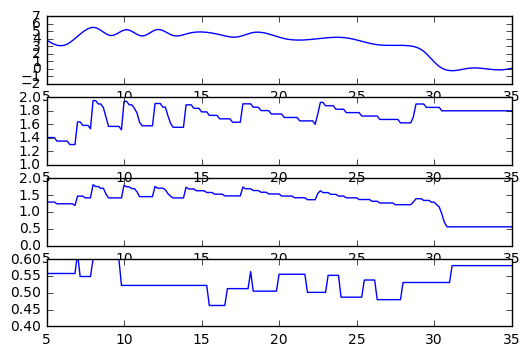

In [248]:
ax1=plt.subplot(411)
plt.plot(hk5731['time'],hk5731['pretok'],label='HK5731')
plt.xlim(5,35)
plt.ylim(-2,7)
ax2=plt.subplot(413,sharex=ax1)
plt.plot(hk5731['time'],hk5731['PIR.016.012'])
plt.xlim(5,35)
plt.ylim(0,2.0)
ax3=plt.subplot(414,sharex=ax1)
plt.plot(hk5731['time'],hk5731['PIR.016.013'])
plt.xlim(5,35)
plt.ylim(0.4,0.6)
ax3=plt.subplot(412,sharex=ax1)
plt.plot(hk5731['time'],hk5731['PIC.016.010'])
plt.xlim(5,35)
plt.ylim(1.,2.0)
plt.show()

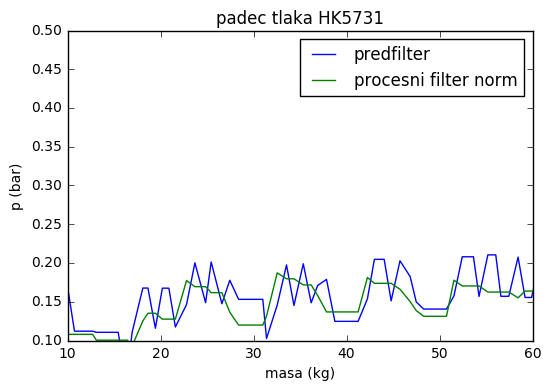

In [280]:
plt.plot(hk5731['masa'],hk5731['tlak'],label="predfilter")
plt.plot(hk5731['masa'],hk5731['tlak1']/6.8, label="procesni filter norm")
plt.title("padec tlaka HK5731")
plt.xlabel("masa (kg)")
plt.ylabel("p (bar)")
plt.ylim(0.1,0.5)
plt.xlim(10,60)
plt.legend()
plt.show()

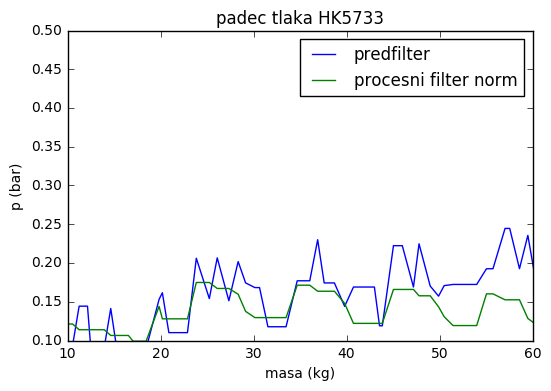

In [281]:
plt.plot(hk5733['masa'],hk5733['tlak'],label="predfilter")
plt.plot(hk5733['masa'],hk5733['tlak1']/6.8, label="procesni filter norm")
plt.title("padec tlaka HK5733")
plt.xlabel("masa (kg)")
plt.ylabel("p (bar)")
plt.ylim(0.1,0.5)
plt.xlim(10,60)
plt.legend()
plt.show()

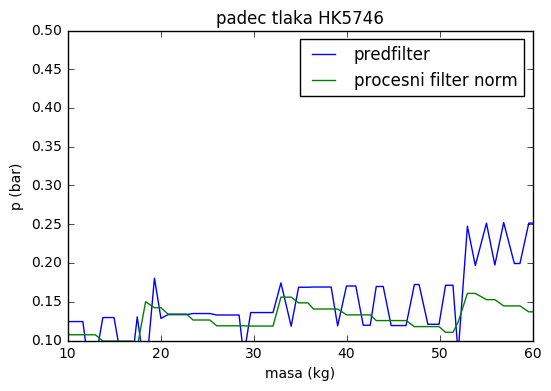

In [282]:
plt.plot(hk5746['masa'],hk5746['tlak'],label="predfilter")
plt.plot(hk5746['masa'],hk5746['tlak1']/6.8, label="procesni filter norm")
plt.title("padec tlaka HK5746")
plt.xlabel("masa (kg)")
plt.ylabel("p (bar)")
plt.ylim(0.1,0.5)
plt.xlim(10,60)
plt.legend()
plt.show()

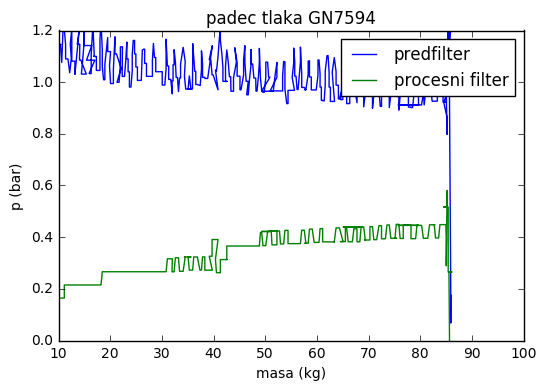

In [332]:
plt.plot(gn7594['masa'],gn7594['tlak'],label="predfilter")
plt.plot(gn7594['masa'],gn7594['tlak1'], label="procesni filter")
plt.title("padec tlaka GN7594")
plt.xlabel("masa (kg)")
plt.ylabel("p (bar)")
plt.ylim(0.,1.2)
plt.xlim(10,100)
plt.legend()
plt.show()

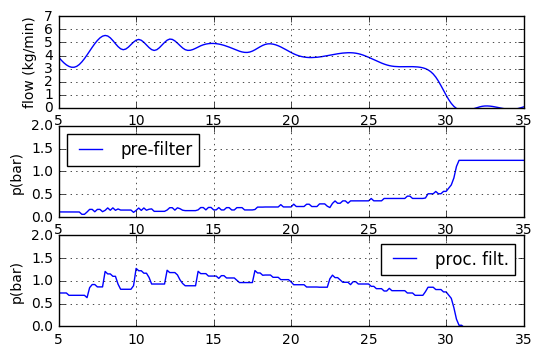

In [381]:
bx1=plt.subplot(311)
plt.plot(hk5731['time'],hk5731['pretok'],label='HK5731')
plt.xlim(5,35)
plt.ylim(0,7)
plt.ylabel("flow (kg/min)")
plt.grid(True)
bx2=plt.subplot(312,sharex=bx1)
plt.plot(hk5731['time'],hk5731['tlak'],label="pre-filter")
plt.xlim(5,35)
plt.ylim(0,2)
plt.ylabel("p(bar)")
plt.legend(loc=2)
plt.grid(True)
bx3=plt.subplot(313,sharex=bx1)
plt.plot(hk5731['time'],hk5731['tlak1'],label="proc. filt.")
plt.legend()
plt.xlim(5,35)
plt.ylim(0,2)
plt.ylabel("p(bar)")
plt.grid(True)
plt.show()

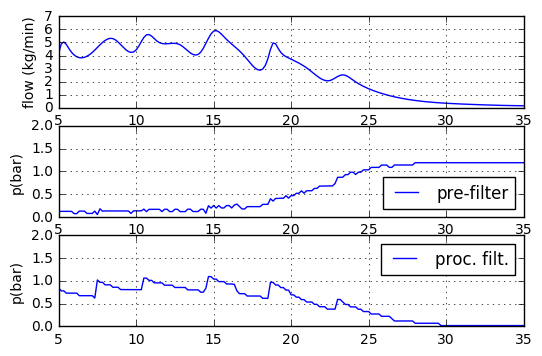

In [382]:
bx1=plt.subplot(311)
plt.plot(hk5746['time'],hk5746['pretok'],label='HK5746')
plt.xlim(5,35)
plt.ylim(0,7)
plt.ylabel("flow (kg/min)")
plt.grid(True)
bx2=plt.subplot(312,sharex=bx1)
plt.plot(hk5746['time'],hk5746['tlak'],label="pre-filter")
plt.xlim(5,35)
plt.ylim(0,2)
plt.ylabel("p(bar)")
plt.legend(loc=4)
plt.grid(True)
bx3=plt.subplot(313,sharex=bx1)
plt.plot(hk5746['time'],hk5746['tlak1'],label="proc. filt.")
plt.legend()
plt.xlim(5,35)
plt.ylim(0,2)
plt.ylabel("p(bar)")
plt.grid(True)
plt.show()

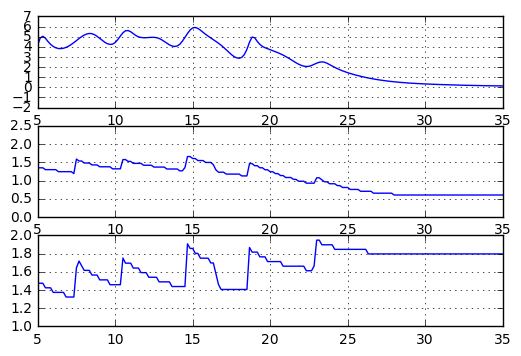

In [364]:
cx1=plt.subplot(311)
plt.plot(hk5746['time'],hk5746['pretok'],label='HK5746')
plt.xlim(5,35)
plt.ylim(-2,7)
plt.grid(True)
cx2=plt.subplot(312,sharex=cx1)
plt.plot(hk5746['time'],hk5746['PIR.016.012'])
plt.xlim(5,35)
plt.ylim(0,2.5)
plt.grid(True)
cx3=plt.subplot(313,sharex=cx1)
plt.plot(hk5746['time'],hk5746['PIC.016.010'])
plt.xlim(5,35)
plt.ylim(1.,2.0)
plt.grid(True)
plt.show()

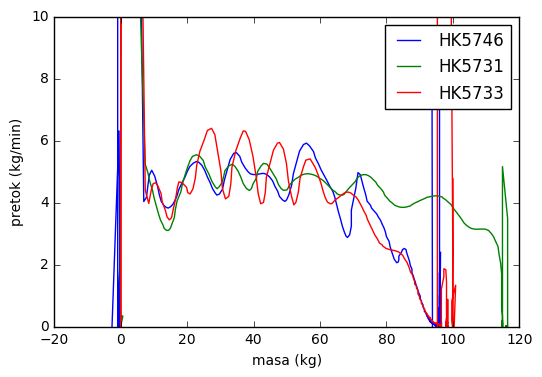

In [334]:
plt.plot(hk5746['masa'],hk5746['pretok'],label="HK5746")
plt.plot(hk5731['masa'],hk5731['pretok'], label="HK5731")
plt.plot(hk5733['masa'],hk5733['pretok'], label="HK5733")
plt.xlabel("masa (kg)")
plt.ylabel("pretok (kg/min)")
plt.ylim(0,10)
#plt.xlim(10,60)
plt.legend()
plt.show()

Derivatives for the volume flow, derived by pressure difference to asses the blocking of the filter
flow derivative according to x are a.... calculate splines for pressure differences

In [354]:
splpressure5731=UnivariateSpline(hk5731['time'],hk5731['tlak'],k=4,s=7)
splpressure5733=UnivariateSpline(hk5733['time'],hk5733['tlak'],k=4,s=7)
splpressure5746=UnivariateSpline(hk5746['time'],hk5746['tlak'],k=4,s=7)

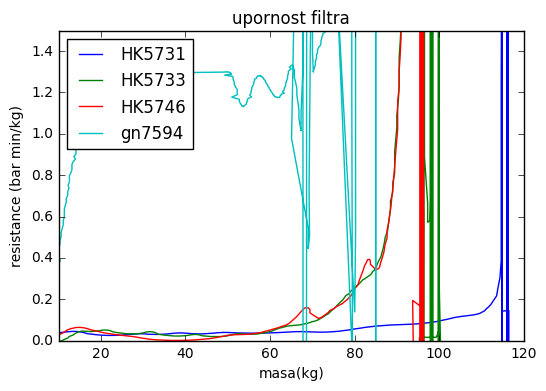

In [385]:
plt.plot(hk5731['masa'],splpressure5731(hk5731['time'])/hk5731['pretok'],label='HK5731')
plt.plot(hk5733['masa'],splpressure5733(hk5733['time'])/hk5733['pretok'],label='HK5733')
plt.plot(hk5746['masa'],splpressure5746(hk5746['time'])/hk5746['pretok'],label='HK5746')
plt.plot(gn7594['masa'],splpressure5746(gn7594['time'])/gn7594['pretok'],label='gn7594')
plt.legend(loc=2)
plt.xlabel("masa(kg)")
plt.ylabel("resistance (bar min/kg)")
plt.ylim(0,1.5)
plt.xlim(10,120)
plt.title("upornost filtra")
plt.show()